I. Data Cleaning and Preprocessing

In [439]:
# Core data handling
import pandas as pd
import numpy as np

# Data visualization (optional but standard practice)
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical preprocessing
from sklearn.preprocessing import StandardScaler

# Outlier handling
from scipy.stats import zscore

In [441]:
# Load dataset
df = pd.read_csv(r"E:\Labmentix Internship\Week 4\OLA_DataSet.xlsx - July.csv")

# Quick structural overview
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103024 entries, 0 to 103023
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Date                        103024 non-null  object 
 1   Time                        103024 non-null  object 
 2   Booking_ID                  103024 non-null  object 
 3   Booking_Status              103024 non-null  object 
 4   Customer_ID                 103024 non-null  object 
 5   Vehicle_Type                103024 non-null  object 
 6   Pickup_Location             103024 non-null  object 
 7   Drop_Location               103024 non-null  object 
 8   V_TAT                       63967 non-null   float64
 9   C_TAT                       63967 non-null   float64
 10  Canceled_Rides_by_Customer  10499 non-null   object 
 11  Canceled_Rides_by_Driver    18434 non-null   object 
 12  Incomplete_Rides            63967 non-null   object 
 13  Incomplete_Rid

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,Canceled_Rides_by_Customer,Canceled_Rides_by_Driver,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating,Vehicle Images
0,26-07-2024 14:00,14:00:00,CNR7153255142,Canceled by Driver,CID713523,Prime Sedan,Tumkur Road,RT Nagar,NaN,NaN,NaN,Personal & Car related issue,NaN,NaN,444,NaN,0,NaN,NaN,https://cdn-icons-png.flaticon.com/128/14183/1...
1,25-07-2024 22:20,22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,NaN,NaN,No,NaN,158,Cash,13,4.1,4.0,https://cdn-icons-png.flaticon.com/128/9983/99...
2,30-07-2024 19:59,19:59:00,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,NaN,NaN,No,NaN,386,UPI,40,4.2,4.8,https://cdn-icons-png.flaticon.com/128/9983/99...
3,22-07-2024 03:15,03:15:00,CNR2395710036,Canceled by Customer,CID581320,eBike,HSR Layout,Vijayanagar,NaN,NaN,Driver is not moving towards pickup location,NaN,NaN,NaN,384,NaN,0,NaN,NaN,https://cdn-icons-png.flaticon.com/128/6839/68...
4,02-07-2024 09:02,09:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,NaN,NaN,No,NaN,822,Credit Card,45,4.0,3.0,https://cdn-icons-png.flaticon.com/128/3202/32...


In [442]:
# Remove duplicate from Booking IDs
df = df.drop_duplicates(subset=['Booking_ID'])

# Remove duplicate Customer IDs if required at customer level
df = df.drop_duplicates(subset=['Customer_ID'], keep='first')

In [443]:
# Identify column types
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [444]:
# Replace 'null' values' at numerical columns with the mean value
for col in numerical_cols:
    df[col].fillna(df[col].mean(), inplace=True)

In [445]:
# Replace 'null' values at categorical columns with the modal value 
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [446]:
# Calculate Z-scores for numerical columns
z_scores = np.abs(zscore(df[numerical_cols]))

# Retain rows where all Z-scores are below threshold
df = df[(z_scores < 3).all(axis=1)]

In [449]:
#Standardize the data
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [452]:
df.head(21)

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,Canceled_Rides_by_Customer,Canceled_Rides_by_Driver,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating,Vehicle Images
0,26-07-2024 14:00,14:00:00,CNR7153255142,Canceled by Driver,CID713523,Prime Sedan,Tumkur Road,RT Nagar,0.000923,-0.000205,Driver is not moving towards pickup location,Personal & Car related issue,No,Customer Demand,-0.068842,Cash,-0.899431,-0.000174,0.000439,https://cdn-icons-png.flaticon.com/128/14183/1...
1,25-07-2024 22:20,22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,0.505896,-1.934644,Driver is not moving towards pickup location,Personal & Car related issue,No,Customer Demand,-0.870625,Cash,-0.075406,0.227435,0.006783,https://cdn-icons-png.flaticon.com/128/9983/99...
2,30-07-2024 19:59,19:59:00,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,1.056180,1.591541,Driver is not moving towards pickup location,Personal & Car related issue,No,Customer Demand,-0.231441,UPI,1.636028,0.447602,1.760223,https://cdn-icons-png.flaticon.com/128/9983/99...
3,22-07-2024 03:15,03:15:00,CNR2395710036,Canceled by Customer,CID581320,eBike,HSR Layout,Vijayanagar,0.000923,-0.000205,Driver is not moving towards pickup location,Personal & Car related issue,No,Customer Demand,-0.237048,Cash,-0.899431,-0.000174,0.000439,https://cdn-icons-png.flaticon.com/128/6839/68...
4,02-07-2024 09:02,09:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,1.276294,-0.171552,Driver is not moving towards pickup location,Personal & Car related issue,No,Customer Demand,0.990859,Credit Card,1.952961,0.007268,-2.185017,https://cdn-icons-png.flaticon.com/128/3202/32...
5,13-07-2024 04:42,04:42:00,CNR8787177882,Success,CID802429,Mini,Kadugodi,Vijayanagar,0.946123,0.181067,Driver is not moving towards pickup location,Personal & Car related issue,No,Customer Demand,-0.828574,UPI,1.699415,-1.313733,1.321863,https://cdn-icons-png.flaticon.com/128/3202/32...
6,23-07-2024 09:51,09:51:00,CNR3612067560,Success,CID476071,Bike,Tumkur Road,Whitefield,-0.594672,-1.582026,Driver is not moving towards pickup location,Personal & Car related issue,No,Customer Demand,-0.921087,Cash,2.206507,-1.754067,1.102683,https://cdn-icons-png.flaticon.com/128/9983/99...
7,11-07-2024 11:12,11:12:00,CNR5374902489,Canceled by Driver,CID735691,Prime Plus,Bannerghatta Road,Sarjapur Road,0.000923,-0.000205,Driver is not moving towards pickup location,Personal & Car related issue,No,Customer Demand,-0.349185,Cash,-0.899431,-0.000174,0.000439,https://cdn-icons-png.flaticon.com/128/11409/1...
8,01-07-2024 19:19,19:19:00,CNR5030602354,Driver Not Found,CID999840,Mini,Chamarajpet,Peenya,0.000923,-0.000205,Driver is not moving towards pickup location,Personal & Car related issue,No,Customer Demand,1.038517,Cash,-0.899431,-0.000174,0.000439,https://cdn-icons-png.flaticon.com/128/3202/32...
9,18-07-2024 01:31,01:31:00,CNR6328453219,Canceled by Driver,CID907133,Auto,RT Nagar,Varthur,0.000923,-0.000205,Driver is not moving towards pickup location,Personal & Car related issue,No,Customer Demand,1.189903,Cash,-0.899431,-0.000174,0.000439,https://cdn-icons-png.flaticon.com/128/16526/1...


In [453]:
# Define output path for Windows Downloads directory
output_path = r"C:\Users\tatha\Downloads\OCD_July.csv"

# Export cleaned dataset
df.to_csv(output_path, index=False)

print("Cleaned dataset successfully exported to Downloads folder.")

II. Exploratory Data Analysis (EDA)

In [456]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv(r"C:\Users\tatha\Downloads\OLA_Cleaned_Dataset_July.csv")

# Drop non-business columns
drop_cols = ["Date","Time","Booking_ID","Customer_ID","Vehicle Images"]
df.drop(columns=drop_cols, inplace=True, errors="ignore")

# Copy for visualization (NO encoding)
df_viz = df.copy()

# Copy for modeling (WITH encoding)
from sklearn.preprocessing import LabelEncoder
df_model = df.copy()

le = LabelEncoder()
for col in df_model.select_dtypes(include="object").columns:
    df_model[col] = le.fit_transform(df_model[col].astype(str))

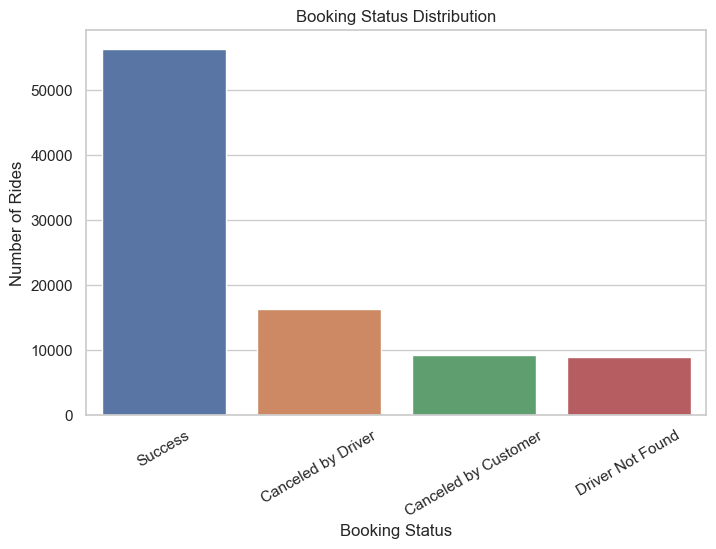

In [458]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=df_viz,
    x="Booking_Status",
    order=df_viz["Booking_Status"].value_counts().index
)

plt.title("Booking Status Distribution")
plt.xlabel("Booking Status")
plt.ylabel("Number of Rides")
plt.xticks(rotation=30)
plt.show()

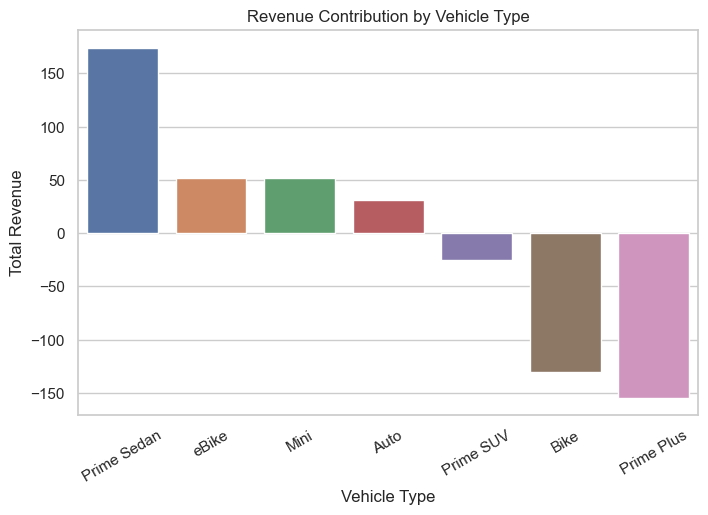

In [460]:
plt.figure(figsize=(8,5))
rev_vehicle = df_viz.groupby("Vehicle_Type")["Booking_Value"].sum().sort_values(ascending=False)

sns.barplot(
    x=rev_vehicle.index,
    y=rev_vehicle.values
)

plt.title("Revenue Contribution by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Total Revenue")
plt.xticks(rotation=30)
plt.show()

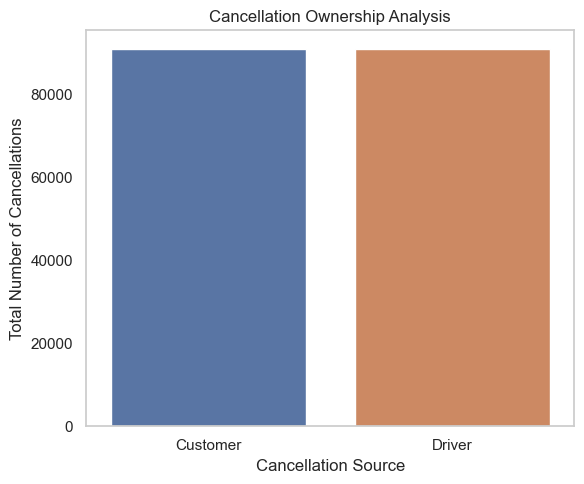

In [518]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------------
# STEP 1: Create binary cancellation flags
# -----------------------------------
# Any non-null value indicates a cancellation event

df_viz["Customer_Cancel_Flag"] = (
    df_viz["Canceled_Rides_by_Customer"]
    .notna()
    .astype(int)
)

df_viz["Driver_Cancel_Flag"] = (
    df_viz["Canceled_Rides_by_Driver"]
    .notna()
    .astype(int)
)

# -----------------------------------
# STEP 2: Aggregate total cancellations
# -----------------------------------
customer_cancel = df_viz["Customer_Cancel_Flag"].sum()
driver_cancel = df_viz["Driver_Cancel_Flag"].sum()

# -----------------------------------
# STEP 3: Prepare dataset for plotting
# -----------------------------------
cancel_data = pd.DataFrame({
    "Cancellation Source": ["Customer", "Driver"],
    "Total Cancellations": [customer_cancel, driver_cancel]
})

# -----------------------------------
# STEP 4: Business-ready visualization
# -----------------------------------
plt.figure(figsize=(6,5))

sns.barplot(
    data=cancel_data,
    x="Cancellation Source",
    y="Total Cancellations"
)

plt.title("Cancellation Ownership Analysis")
plt.xlabel("Cancellation Source")
plt.ylabel("Total Number of Cancellations")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

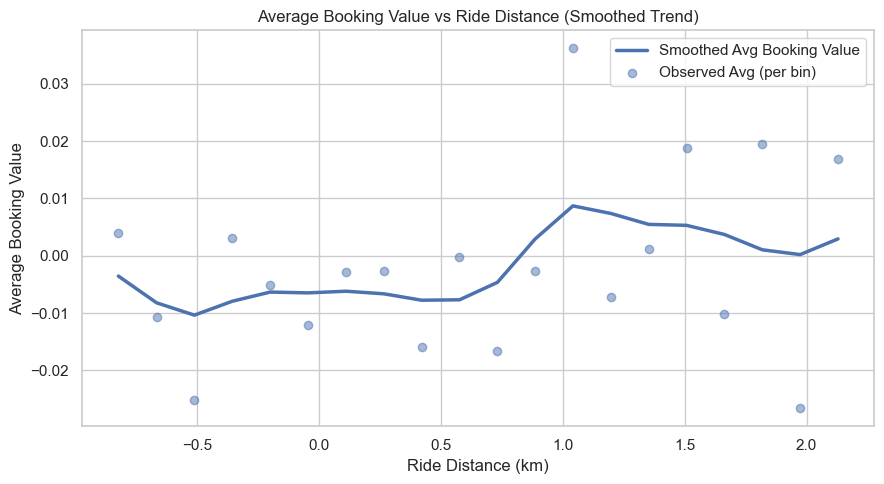

In [473]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Create distance bins
df_viz["Distance_Bin"] = pd.cut(df_viz["Ride_Distance"], bins=20)

# Aggregate mean booking value
avg_fare = (
    df_viz
    .groupby("Distance_Bin", observed=True)["Booking_Value"]
    .mean()
    .reset_index()
)

# Extract bin midpoints for clean X-axis
avg_fare["Distance_Mid"] = avg_fare["Distance_Bin"].apply(lambda x: x.mid)

# Sort to ensure proper line flow
avg_fare = avg_fare.sort_values("Distance_Mid")

# Smooth the booking value curve
avg_fare["Smoothed_Booking_Value"] = gaussian_filter1d(
    avg_fare["Booking_Value"], sigma=1.2
)
plt.figure(figsize=(9,5))

plt.plot(
    avg_fare["Distance_Mid"],
    avg_fare["Smoothed_Booking_Value"],
    linewidth=2.5,
    label="Smoothed Avg Booking Value"
)

plt.scatter(
    avg_fare["Distance_Mid"],
    avg_fare["Booking_Value"],
    alpha=0.5,
    label="Observed Avg (per bin)"
)

plt.xlabel("Ride Distance (km)")
plt.ylabel("Average Booking Value")
plt.title("Average Booking Value vs Ride Distance (Smoothed Trend)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\tatha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


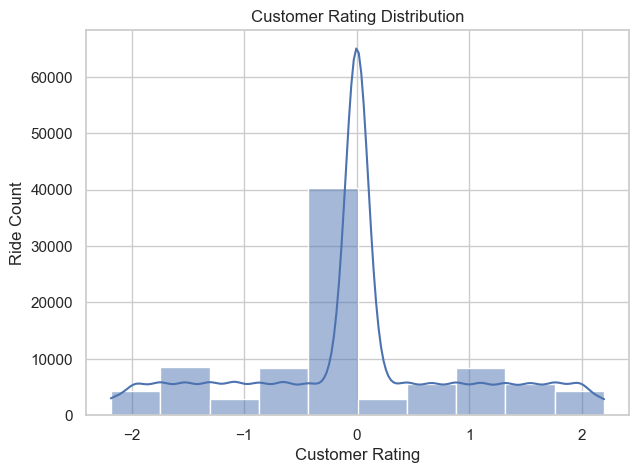

In [475]:
plt.figure(figsize=(7,5))
sns.histplot(df_viz["Customer_Rating"], bins=10, kde=True)

plt.title("Customer Rating Distribution")
plt.xlabel("Customer Rating")
plt.ylabel("Ride Count")
plt.show()

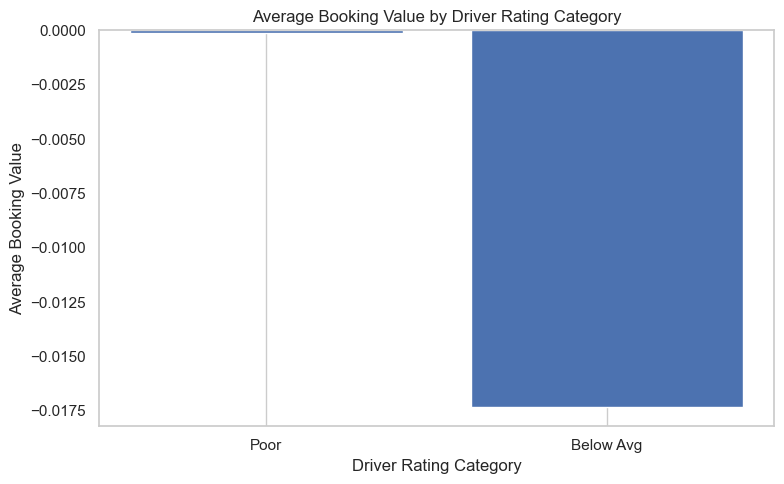

In [476]:
import pandas as pd
import matplotlib.pyplot as plt

# Create rating bins
df_viz["Rating_Bin"] = pd.cut(
    df_viz["Driver_Ratings"],
    bins=[0, 2, 3, 4, 4.5, 5],
    labels=["Poor", "Below Avg", "Good", "Very Good", "Excellent"]
)

# Aggregate metrics
rating_summary = (
    df_viz
    .groupby("Rating_Bin", observed=True)["Booking_Value"]
    .mean()
    .reset_index()
)


plt.figure(figsize=(8,5))

plt.bar(
    rating_summary["Rating_Bin"],
    rating_summary["Booking_Value"]
)

plt.xlabel("Driver Rating Category")
plt.ylabel("Average Booking Value")
plt.title("Average Booking Value by Driver Rating Category")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

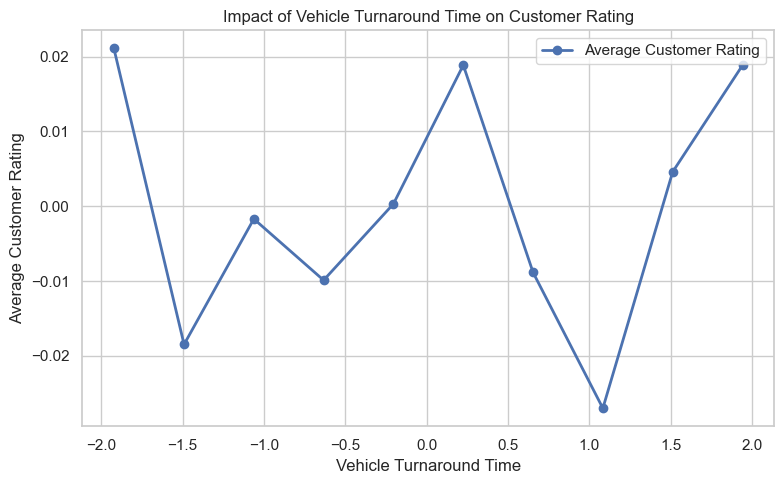

In [508]:
# Create V_TAT bins (adjust bins if needed)
df_viz["V_TAT_Bin"] = pd.cut(
    df_viz["V_TAT"],
    bins=10
)

# Aggregate customer rating
tat_rating = (
    df_viz
    .groupby("V_TAT_Bin", observed=True)["Customer_Rating"]
    .mean()
    .reset_index()
)

# Convert bins to midpoints for clean X-axis
tat_rating["V_TAT_Mid"] = tat_rating["V_TAT_Bin"].apply(lambda x: x.mid)

tat_rating = tat_rating.sort_values("V_TAT_Mid")

plt.figure(figsize=(8,5))

plt.plot(
    tat_rating["V_TAT_Mid"],
    tat_rating["Customer_Rating"],
    marker="o",
    linewidth=2,
    label="Average Customer Rating"
)

plt.xlabel("Vehicle Turnaround Time")
plt.ylabel("Average Customer Rating")
plt.title("Impact of Vehicle Turnaround Time on Customer Rating")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

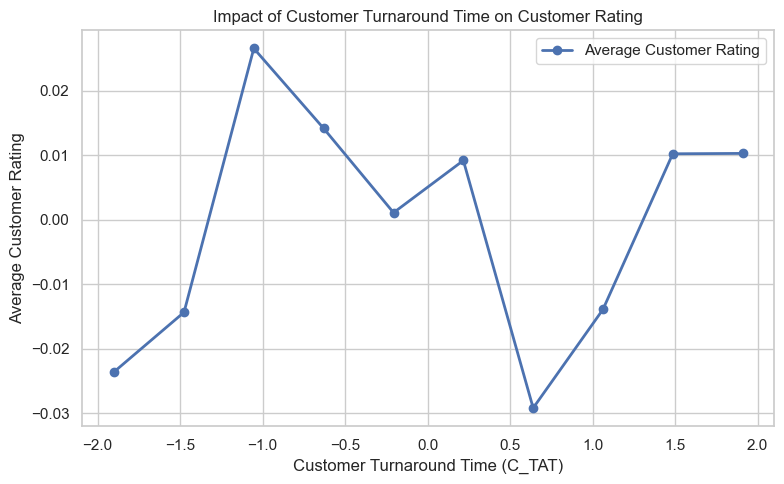

In [510]:
import pandas as pd
import matplotlib.pyplot as plt

# Create C_TAT bins
df_viz["C_TAT_Bin"] = pd.cut(
    df_viz["C_TAT"],
    bins=10
)

# Aggregate average customer rating
ctat_rating = (
    df_viz
    .groupby("C_TAT_Bin", observed=True)["Customer_Rating"]
    .mean()
    .reset_index()
)

# Convert bins to numeric midpoints
ctat_rating["C_TAT_Mid"] = ctat_rating["C_TAT_Bin"].apply(lambda x: x.mid)

# Ensure correct ordering
ctat_rating = ctat_rating.sort_values("C_TAT_Mid")

plt.figure(figsize=(8,5))

plt.plot(
    ctat_rating["C_TAT_Mid"],
    ctat_rating["Customer_Rating"],
    marker="o",
    linewidth=2,
    label="Average Customer Rating"
)

plt.xlabel("Customer Turnaround Time (C_TAT)")
plt.ylabel("Average Customer Rating")
plt.title("Impact of Customer Turnaround Time on Customer Rating")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

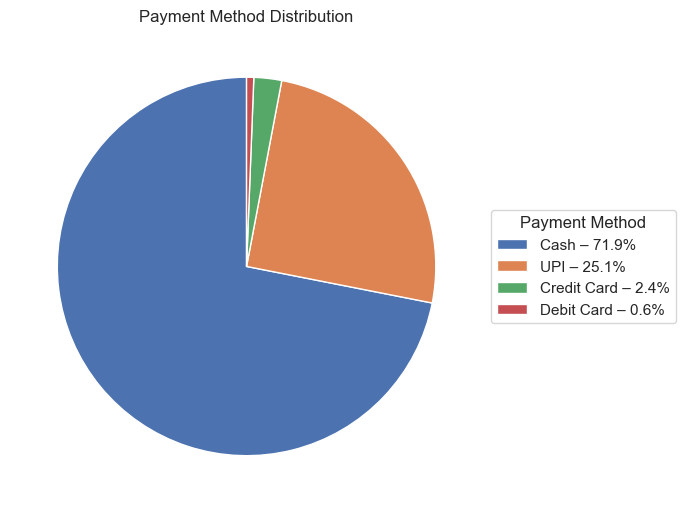

In [512]:
import matplotlib.pyplot as plt

# Prepare data
payment_counts = df_viz["Payment_Method"].value_counts()
payment_pct = (payment_counts / payment_counts.sum() * 100).round(1)

plt.figure(figsize=(7,7))

# Draw pie WITHOUT labels or autopct
wedges = plt.pie(
    payment_counts.values,
    startangle=90
)[0]

# Custom legend with percentages
legend_labels = [
    f"{method} – {pct}%" 
    for method, pct in zip(payment_counts.index, payment_pct)
]

plt.legend(
    wedges,
    legend_labels,
    title="Payment Method",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.title("Payment Method Distribution")
plt.ylabel("")
plt.tight_layout()
plt.show()

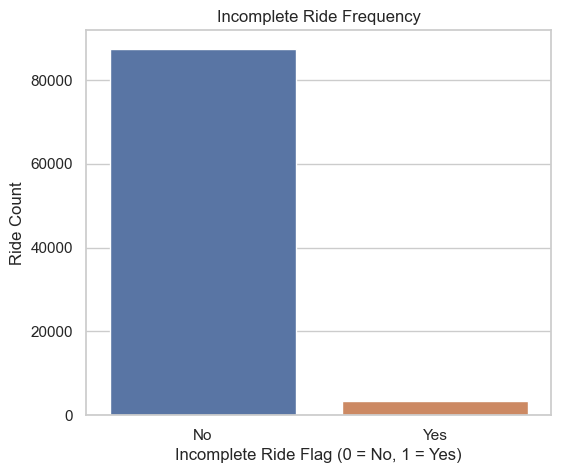

In [514]:
plt.figure(figsize=(6,5))
sns.countplot(x="Incomplete_Rides", data=df_viz)

plt.title("Incomplete Ride Frequency")
plt.xlabel("Incomplete Ride Flag (0 = No, 1 = Yes)")
plt.ylabel("Ride Count")
plt.show()

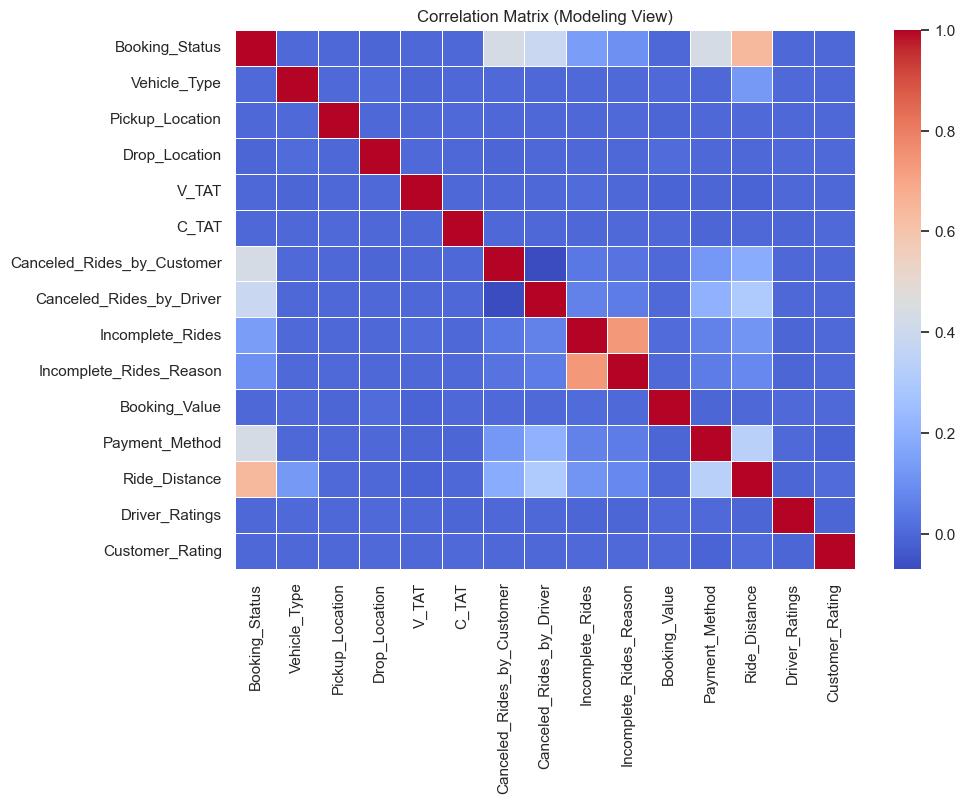

In [516]:
plt.figure(figsize=(10,7))
sns.heatmap(
    df_model.corr(),
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Correlation Matrix (Modeling View)")
plt.show()